In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C://Users/siddh/Progamming/Projects/Data_Science_Projects/Stock_Prediction/data/data.csv',index_col='Date',parse_dates=True)
df.head()

,Close
Date,
2012-02-16,15.076406
2012-02-17,15.073701
2012-02-20,15.073701
2012-02-21,15.455858
2012-02-22,15.401523


In [3]:
len(df)

3572

In [4]:
train = df[:2679]
test = df[2679:]
print(train.shape,test.shape)

(2679, 1) (893, 1)


In [5]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,
                    order=(2,2,1)
                   )
output = model.fit()

C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [6]:
forecast = output.forecast(steps=len(test))
test['ARIMA'] = forecast

C:\Users\siddh\AppData\Local\Temp\ipykernel_23016\1162686976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA'] = forecast


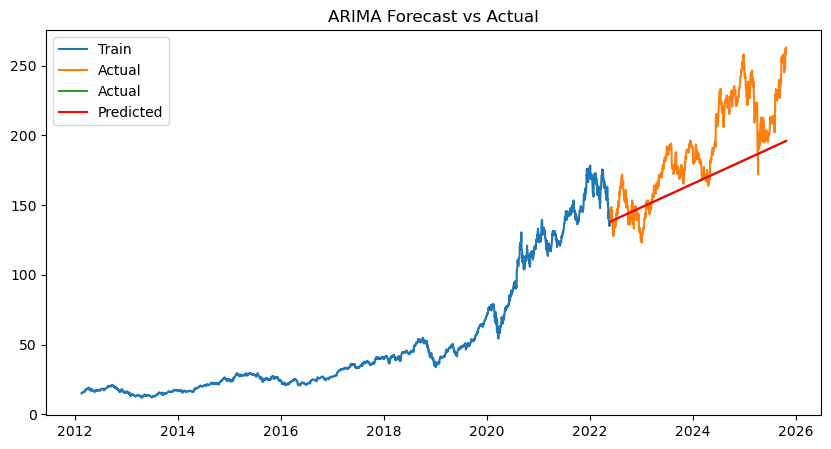

In [7]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(test.index, test['ARIMA'], label='Predicted', color='red')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [8]:
test.head()

,Close,ARIMA
Date,,
2022-05-25,138.144424,138.108016
2022-05-26,141.349289,138.248913
2022-05-27,147.110229,138.306363
2022-05-30,147.110229,138.369608
2022-05-31,146.323776,138.434830


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
mae = mean_absolute_error(test['Close'], test['ARIMA'])
rmse = np.sqrt(mean_squared_error(test['Close'], test['ARIMA']))
r2 = r2_score(test['Close'], test['ARIMA'])

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 24.1492
RMSE: 30.4598
R²: 0.2086


In [11]:
model = ARIMA(df,
                    order=(2,2,1)
                   )
arima_full_fit = model.fit()

C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [12]:
n_steps = 90  # number of future days
forecast_result = arima_full_fit.get_forecast(steps=n_steps)
forecast_values = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

In [13]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_steps)
forecast_series = pd.Series(forecast_values, index=future_dates)

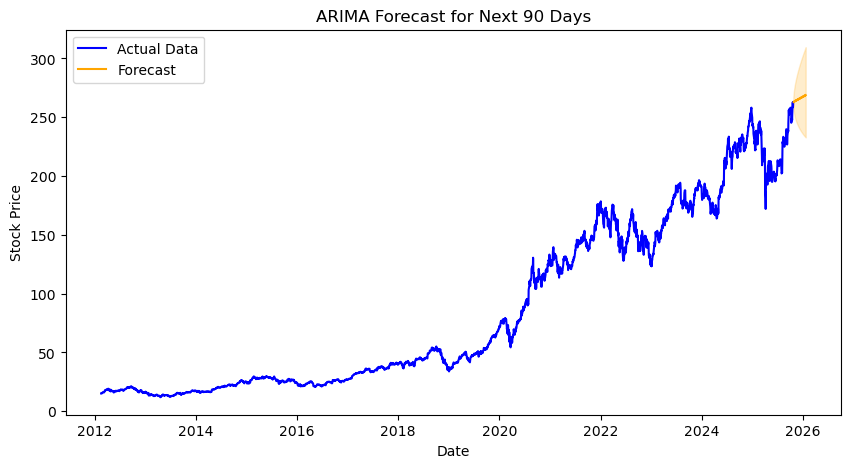

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df, label='Actual Data', color='blue')
plt.plot(forecast_series, label='Forecast', color='orange')
plt.fill_between(forecast_series.index,
                 confidence_intervals.iloc[:,0],
                 confidence_intervals.iloc[:,1],
                 color='orange', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('ARIMA Forecast for Next 90 Days')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

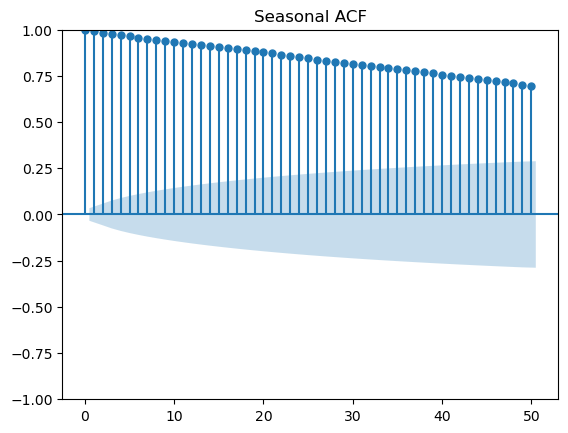

<Figure size 1200x600 with 0 Axes>

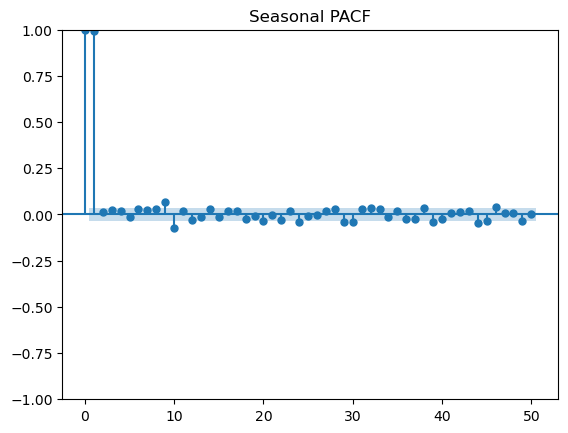

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))
plot_acf(df['Close'].diff(252).dropna(), lags=50)
plt.title('Seasonal ACF')
plt.show()

plt.figure(figsize=(12,6))
plot_pacf(df['Close'].diff(252).dropna(), lags=50)
plt.title('Seasonal PACF')
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

# Seasonal differencing
df_diff = df['Close'].diff(252).dropna()
adf_result = adfuller(df_diff)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -3.128553256898704
p-value: 0.024511021981418288


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model = SARIMAX(train,
                order=(2, 2, 1),         # p, d, q
                seasonal_order=(1, 1, 1, 7),  # P, D, Q, s
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_fit = model.fit(disp=False)

C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [19]:
forecast = sarima_fit.forecast(steps=len(test))
test['SARIMA'] = forecast

C:\Users\siddh\AppData\Local\Temp\ipykernel_23016\53227087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SARIMA'] = forecast


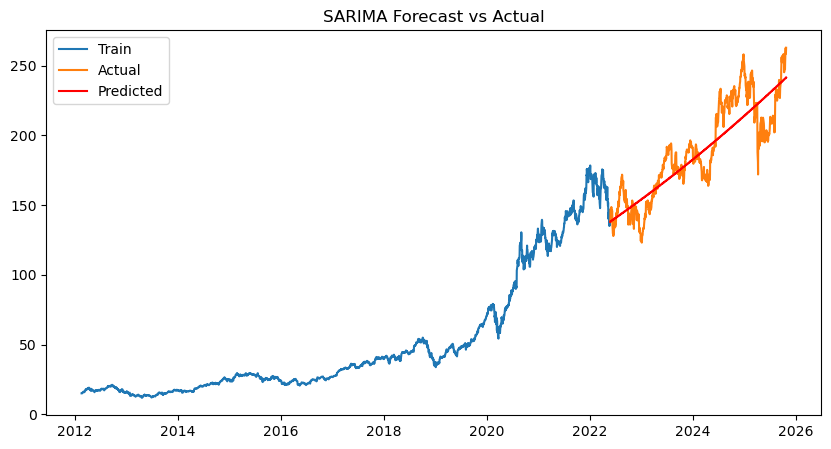

In [20]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test['Close'], label='Actual')
plt.plot(test.index, test['SARIMA'], label='Predicted', color='red')
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.show()


In [21]:
mae = mean_absolute_error(test['Close'], test['SARIMA'])
rmse = np.sqrt(mean_squared_error(test['Close'], test['SARIMA']))
r2 = r2_score(test['Close'], test['SARIMA'])

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 13.7326
RMSE: 16.7091
R²: 0.7618


In [22]:
model_full = SARIMAX(df,  # full series
                     order=(2,2,1),
                     seasonal_order=(1,1,1,7),
                     enforce_stationarity=False,
                     enforce_invertibility=False)
sarima_full_fit = model_full.fit(disp=False)

C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [23]:
future_steps = 90  # number of days to forecast
forecast_result = sarima_full_fit.get_forecast(steps=future_steps)

# Predicted values
forecast_values = forecast_result.predicted_mean

# Confidence intervals
conf_int = forecast_result.conf_int()

In [24]:
last_date = df.index[-1]  # last date in your training set
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a pandas Series for easy plotting
forecast_series = pd.Series(forecast_values.values, index=future_dates)


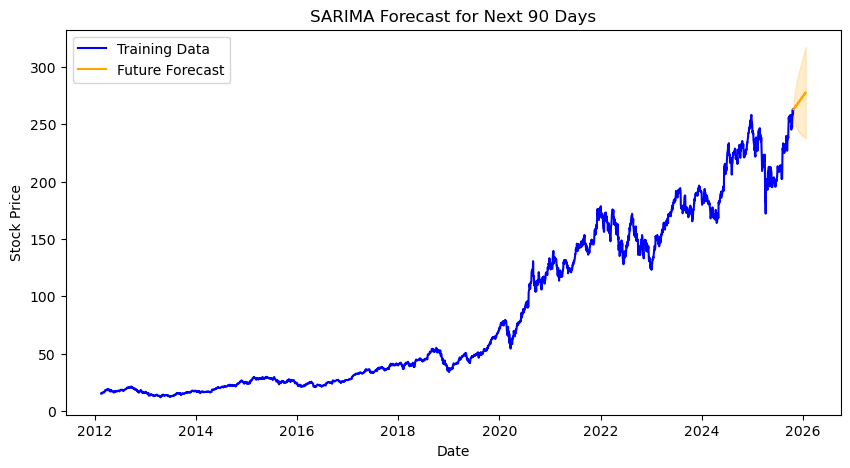

In [25]:
plt.figure(figsize=(10,5))
plt.plot(df, label='Training Data', color='blue')
plt.plot(forecast_series, label='Future Forecast', color='orange')
plt.fill_between(future_dates, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='orange', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('SARIMA Forecast for Next 90 Days')
plt.legend()
plt.show()


In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
tes_add_model = ExponentialSmoothing(train, trend='add', seasonal='add')
fitted_tes_add_model = tes_add_model.fit() 

tes_mul_model = ExponentialSmoothing(train, trend='mul', seasonal='mul')
fitted_tes_mul_model = tes_mul_model.fit() 

C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [28]:
test['TES_Add'] = fitted_tes_add_model.forecast(steps=len(test))
test['TES_Mul'] = fitted_tes_mul_model.forecast(steps=len(test))
test

C:\Users\siddh\AppData\Local\Temp\ipykernel_23016\3402509313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TES_Add'] = fitted_tes_add_model.forecast(steps=len(test))
C:\Users\siddh\AppData\Local\Temp\ipykernel_23016\3402509313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TES_Mul'] = fitted_tes_mul_model.forecast(steps=len(test))


,Close,ARIMA,SARIMA,TES_Add,TES_Mul
Date,,,,,
2022-05-25,138.144424,138.108016,138.018705,138.247853,138.319134
2022-05-26,141.349289,138.248913,138.453314,138.183830,138.164787
2022-05-27,147.110229,138.306363,138.390394,138.150105,138.276847
2022-05-30,147.110229,138.369608,138.453721,138.304574,138.659798
2022-05-31,146.323776,138.434830,138.494596,138.405254,139.058166
...,...,...,...,...,...
2025-10-20,262.239990,195.790415,241.008046,178.949584,384.511166
2025-10-21,262.769989,195.855297,241.019208,179.050263,385.615862
2025-10-22,258.450012,195.920178,241.409793,179.122495,385.783140


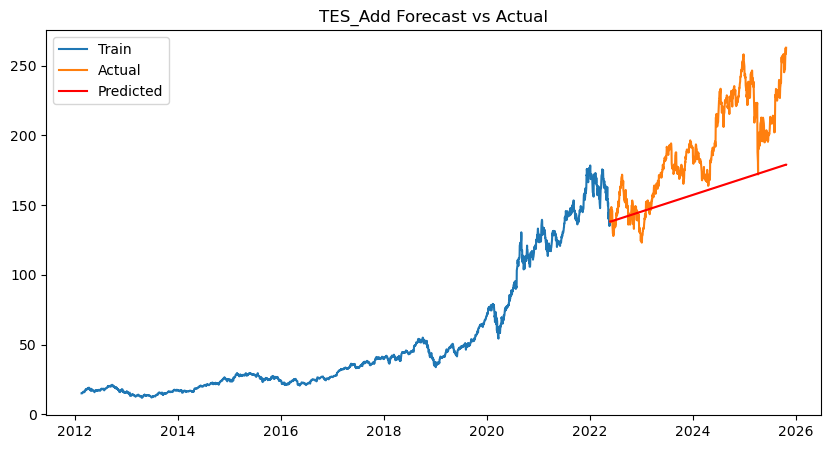

In [29]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test['Close'], label='Actual')
plt.plot(test.index, test['TES_Add'], label='Predicted', color='red')
plt.legend()
plt.title("TES_Add Forecast vs Actual")
plt.show()


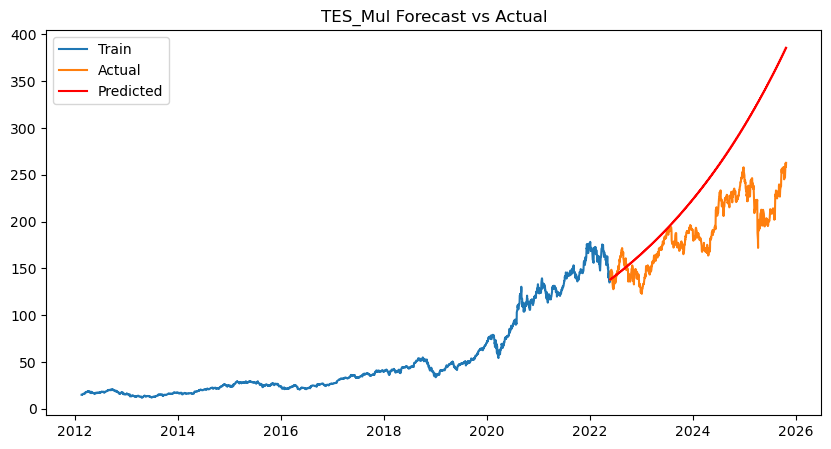

In [30]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test['Close'], label='Actual')
plt.plot(test.index, test['TES_Mul'], label='Predicted', color='red')
plt.legend()
plt.title("TES_Mul Forecast vs Actual")
plt.show()


In [31]:
mae = mean_absolute_error(test['Close'], test['TES_Add'])
rmse = np.sqrt(mean_squared_error(test['Close'], test['TES_Add']))
r2 = r2_score(test['Close'], test['TES_Add'])

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 31.9061
RMSE: 39.0453
R²: -0.3004


In [32]:
mae = mean_absolute_error(test['Close'], test['TES_Mul'])
rmse = np.sqrt(mean_squared_error(test['Close'], test['TES_Mul']))
r2 = r2_score(test['Close'], test['TES_Mul'])

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 53.5504
RMSE: 69.0731
R²: -3.0697


In [33]:
tes_add_model = ExponentialSmoothing(df, trend='add', seasonal='add')
fitted_tes_add_model = tes_add_model.fit() 

tes_mul_model = ExponentialSmoothing(df, trend='mul', seasonal='mul')
fitted_tes_mul_model = tes_mul_model.fit() 

C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\siddh\anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [34]:
future_steps = 90  # number of days to forecast

forecast_values_add = fitted_tes_add_model.forecast(future_steps)
forecast_values_mul = fitted_tes_mul_model.forecast(future_steps)

In [35]:
last_date = df.index[-1]  # last date in your training set
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a pandas Series for easy plotting
forecast_series = pd.Series(forecast_values_add.values, index=future_dates)
forecast_series1 = pd.Series(forecast_values_mul.values, index=future_dates)


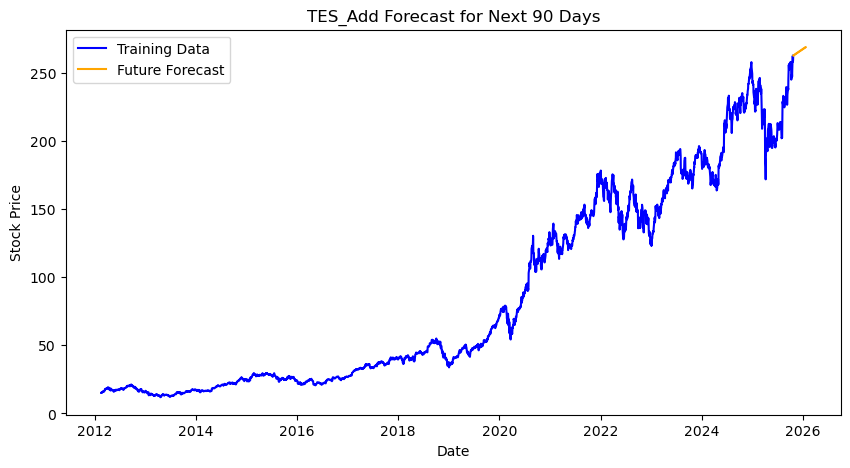

In [36]:
plt.figure(figsize=(10,5))
plt.plot(df, label='Training Data', color='blue')
plt.plot(forecast_series, label='Future Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TES_Add Forecast for Next 90 Days')
plt.legend()
plt.show()


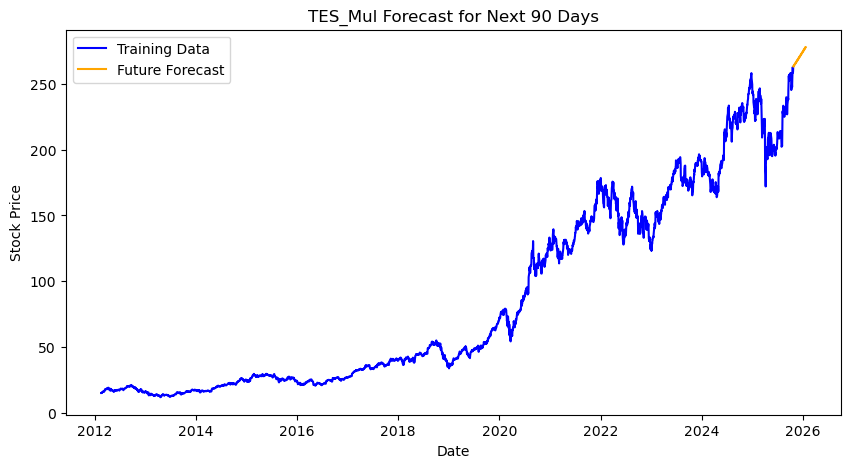

In [37]:
plt.figure(figsize=(10,5))
plt.plot(df, label='Training Data', color='blue')
plt.plot(forecast_series1, label='Future Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TES_Mul Forecast for Next 90 Days')
plt.legend()
plt.show()


In [41]:
import pickle

with open("C:/Users/siddh/Progamming/Projects/Data_Science_Projects/Stock_Prediction/models/arima.pkl", "wb") as f:
    pickle.dump(arima_full_fit, f)

with open("C:/Users/siddh/Progamming/Projects/Data_Science_Projects/Stock_Prediction/models/sarima.pkl", "wb") as f:
    pickle.dump(sarima_full_fit, f)
    
with open("C:/Users/siddh/Progamming/Projects/Data_Science_Projects/Stock_Prediction/models/tes_add.pkl", "wb") as f:
    pickle.dump(fitted_tes_add_model, f)

with open("C:/Users/siddh/Progamming/Projects/Data_Science_Projects/Stock_Prediction/models/tes_mul.pkl", "wb") as f:
    pickle.dump(fitted_tes_mul_model, f)
